# Acoustic Anomaly Detection with Azure Machine Learning
## 4. Spectograms creation

<img src="https://github.com/retkowsky/Audio_Analytics_With_AzureML/raw/main/image.jpg" width = 800>
<div class="alert alert-info"> <b> In this notebook we will generate spectograms for all the samples files</b></div>

Serge Retkowsky | serge.retkowsky@microsoft.com | 31-May-2022 | V1

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import wave
from scipy.io import wavfile as wav
import os
import os.path, time
import seaborn
import glob
from datetime import datetime
import shutil
from pathlib import Path
import urllib.request
from zipfile import ZipFile

In [2]:
import sys
sys.version

'3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'

In [3]:
import datetime
print('Current Date: ' + str(datetime.datetime.today()))

Current Date: 2022-05-31 09:03:58.288565


In [4]:
def createdir(mydir):
    
    path = Path(mydir)
    
    if path.is_dir():
        print("Directory", mydir, 'exists so we will use it.')
    
    else:
        os.mkdir(mydir)

## Generating all the spectograms

In [5]:
durationsecs = 10
hoplength = 512
samprate = 44100
nfft = 2048

In [6]:
def spectogram_batch(wavdir, resultdir):
    
    createdir(resultdir)
    
    for root, _, files in os.walk(wavdir):
        print("Directory", root, "has", len(files), "files.")
    
    from datetime import datetime
    start_time = datetime.now()
    
    print("Creating the spectograms for all the wav files from", wavdir)
    print("\nRunning...\n")
    
    wavfiles = [file for file in os.listdir(wavdir) if file.endswith(('wav'))]
    
    for wavfile in wavfiles:
        
        plt.figure(figsize = (15, 7))
        wavfile = wavdir + wavfile
        print(wavfile)
        y, sr = librosa.load(wavfile,  sr = None, mono = True, offset = 0.0, duration = durationsecs)
        plt.ioff()
        fig = plt.figure()
        
        mel_signal = librosa.feature.melspectrogram(y = y, sr = sr, hop_length = hoplength, n_fft = nfft)
        spectrogram = np.abs(mel_signal)
        power_to_db = librosa.power_to_db(spectrogram, ref = np.max)
        librosa.display.specshow(power_to_db, sr = sr, x_axis = 'time', y_axis = 'mel', 
                                 cmap = 'magma', hop_length = hoplength)

        plt.axis('off')
        outputfilename = wavfile.split('.')
        outputfilename = outputfilename[0].split('/')
        
        savefilename = resultdir + '/' + str(outputfilename[2]) + '.jpg'
        plt.savefig(savefilename, dpi = 300)
        plt.close('all')
    
    print('\nDone.')
    end_time = datetime.now()
    print("Execution time:", (end_time-start_time))

In [7]:
createdir("spectogramsmachine")

In [8]:
createdir("spectogramsmachine/OK")

In [9]:
createdir("spectogramsmachine/KO")

## Running the spectograms for all the samples WAV files

In [10]:
spectogram_batch("soundssamples/KO/", "spectogramsmachine/KO/")

Directory spectogramsmachine/KO/ exists so we will use it.
Directory soundssamples/KO/ has 61 files.
Creating the spectograms for all the wav files from soundssamples/KO/

Running...

soundssamples/KO/machine_KO_1.wav
soundssamples/KO/machine_KO_10.wav
soundssamples/KO/machine_KO_11.wav
soundssamples/KO/machine_KO_12.wav
soundssamples/KO/machine_KO_13.wav
soundssamples/KO/machine_KO_14.wav
soundssamples/KO/machine_KO_15.wav
soundssamples/KO/machine_KO_16.wav
soundssamples/KO/machine_KO_17.wav
soundssamples/KO/machine_KO_18.wav
soundssamples/KO/machine_KO_19.wav
soundssamples/KO/machine_KO_2.wav
soundssamples/KO/machine_KO_20.wav
soundssamples/KO/machine_KO_21.wav
soundssamples/KO/machine_KO_22.wav
soundssamples/KO/machine_KO_23.wav
soundssamples/KO/machine_KO_24.wav
soundssamples/KO/machine_KO_25.wav
soundssamples/KO/machine_KO_26.wav
soundssamples/KO/machine_KO_27.wav
soundssamples/KO/machine_KO_28.wav
soundssamples/KO/machine_KO_29.wav
soundssamples/KO/machine_KO_3.wav
soundssamples/

In [11]:
spectogram_batch("soundssamples/OK/", "spectogramsmachine/OK/")

Directory spectogramsmachine/OK/ exists so we will use it.
Directory soundssamples/OK/ has 61 files.
Creating the spectograms for all the wav files from soundssamples/OK/

Running...

soundssamples/OK/machine_OK_1.wav
soundssamples/OK/machine_OK_10.wav
soundssamples/OK/machine_OK_11.wav
soundssamples/OK/machine_OK_12.wav
soundssamples/OK/machine_OK_13.wav
soundssamples/OK/machine_OK_14.wav
soundssamples/OK/machine_OK_15.wav
soundssamples/OK/machine_OK_16.wav
soundssamples/OK/machine_OK_17.wav
soundssamples/OK/machine_OK_18.wav
soundssamples/OK/machine_OK_19.wav
soundssamples/OK/machine_OK_2.wav
soundssamples/OK/machine_OK_20.wav
soundssamples/OK/machine_OK_21.wav
soundssamples/OK/machine_OK_22.wav
soundssamples/OK/machine_OK_23.wav
soundssamples/OK/machine_OK_24.wav
soundssamples/OK/machine_OK_25.wav
soundssamples/OK/machine_OK_26.wav
soundssamples/OK/machine_OK_27.wav
soundssamples/OK/machine_OK_28.wav
soundssamples/OK/machine_OK_29.wav
soundssamples/OK/machine_OK_3.wav
soundssamples/

## Checking the number of generated files

In [12]:
for root, _, files in os.walk('spectogramsmachine/OK/'):
    print("Directory", root, "has", len(files), "spectogram jpg files.")

Directory spectogramsmachine/OK/ has 61 spectogram jpg files.


In [13]:
for root, _, files in os.walk('spectogramsmachine/KO/'):
    print("Directory", root, "has", len(files), "spectogram jpg files.")

Directory spectogramsmachine/KO/ has 61 spectogram jpg files.


Text(0, 0.5, 'Number of Spectograms')

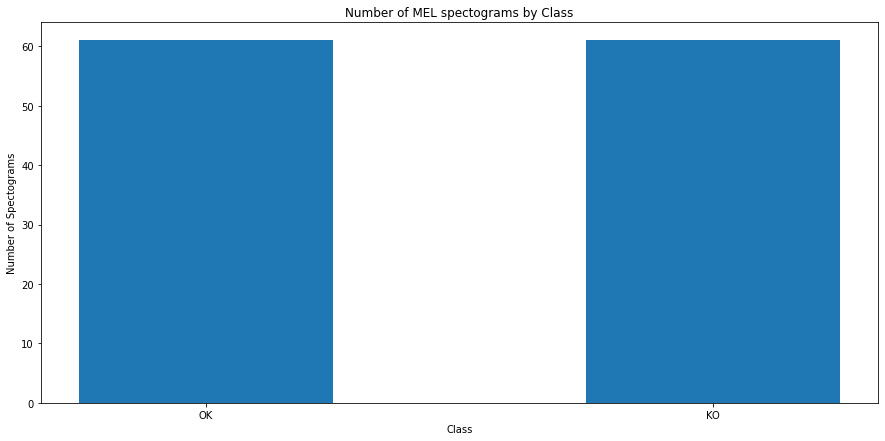

In [14]:
number_classes = {'OK': len(os.listdir('spectogramsmachine/OK')),
                'KO': len(os.listdir('spectogramsmachine/KO')) }

plt.figure(figsize = (15, 7))
plt.bar(number_classes.keys(), number_classes.values(), width = 0.5)
plt.title("Number of MEL spectograms by Class")
plt.xlabel('Class')
plt.ylabel('Number of Spectograms')

## Zipping the files (you can use this zip file to download the images and load them into Azure Custom Vision.ai)

In [15]:
createdir("zip")

In [16]:
print("Zipping the files...")
shutil.make_archive("zip/spectograms", "zip", "spectogramsmachine/")
print("Done.")

Zipping the files...
Done.


In [17]:
!ls zip/spectograms.zip -lh

-rwxrwxrwx 1 root root 51M May 31 09:05 zip/spectograms.zip


In [18]:
from IPython.display import FileLink

LINK = FileLink(path = 'zip/spectograms.zip')
print("Click to download the file:")
LINK

Click to download the file:


/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow8/code/Users/seretkow/MachineNoiseDetection/zip/spectograms.zip

Now you can use Azure Custom Vision to create an image classification model using the images in this zip file. You can 1) load your images for the 2 class we want to predict 2) Create a model and 3) deploy the model using www.customvision.ai

> End. You can go to the next notebook

Note: All these Python notebooks were made for demo purposes. They were not designed for production usage. Some feature can be currently in public preview. This preview version is provided without a service-level agreement. Certain features might not be supported or might have constrained capabilities. For more information, see Supplemental Terms of Use for Microsoft Azure Previews. https://azure.microsoft.com/en-us/support/legal/preview-supplemental-terms/